In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/nba_player_seasons.csv"

<IPython.core.display.Javascript object>

* Read the data located at `data_url` into a `pandas` dataframe
* A dictionary of the column name abbreviations can be found [here](https://www.basketball-reference.com/about/glossary.html)

In [3]:
nba = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

Get to know the data, what things should we explore?

* List of things I must insist we explore (the rest is up to you)
  * The number of rows/columns
  * The datatypes of each column
  

In [4]:
nba.head(2)

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7


<IPython.core.display.Javascript object>

In [5]:
# (n_rows, n_cols)
# (height, width)
nba.shape

(2141, 30)

<IPython.core.display.Javascript object>

In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 30 columns):
Seas      2141 non-null int64
Player    2141 non-null object
Pos       2141 non-null object
Age       2141 non-null int64
Tm        2141 non-null object
G         2141 non-null int64
GS        2141 non-null int64
MP        2141 non-null float64
FG        2141 non-null float64
FGA       2141 non-null float64
FG%       2131 non-null float64
3P        2141 non-null float64
3PA       2141 non-null float64
3P%       1967 non-null float64
2P        2141 non-null float64
2PA       2141 non-null float64
2P%       2110 non-null float64
eFG%      2131 non-null float64
FT        2141 non-null float64
FTA       2141 non-null float64
FT%       2037 non-null float64
ORB       2141 non-null float64
DRB       2141 non-null float64
TRB       2141 non-null float64
AST       2141 non-null float64
STL       2141 non-null float64
BLK       2141 non-null float64
TOV       2141 non-null float64
PF      

<IPython.core.display.Javascript object>

## What is a 'typical' number of the points column (`'PTS'`)?

Present your answer(s) with proof:
* numerically
  * generate at least 2 summary metrics that can be thought of as 'typical'
* graphically
  * what plot type might we use?
  * add your numeric values to the plot

In [7]:
avg = nba["PTS"].mean()
avg

8.32190565156469

<IPython.core.display.Javascript object>

In [8]:
med = nba["PTS"].median()
med

6.9

<IPython.core.display.Javascript object>

In [9]:
mode = nba["PTS"].astype(int).mode()

# .mode() returns a series
# this is to pull out first item of series for easy plotting
mode = mode[0]
mode

5

<IPython.core.display.Javascript object>

Graphically

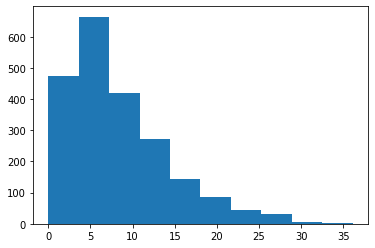

<IPython.core.display.Javascript object>

In [10]:
# Option 1: use matplotlib
plt.hist(nba["PTS"])
plt.show()

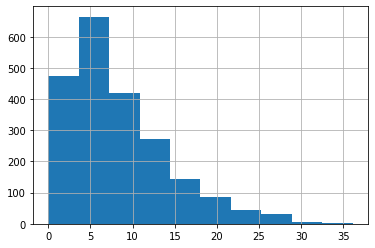

<IPython.core.display.Javascript object>

In [11]:
# Option 2: use pandas
nba["PTS"].hist()
plt.show()

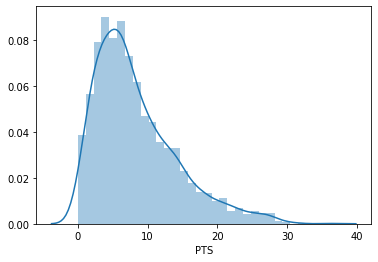

<IPython.core.display.Javascript object>

In [12]:
# Option 3: use seaborn
sns.distplot(nba["PTS"])
plt.show()

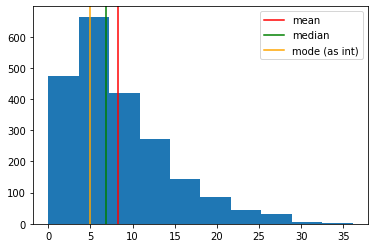

<IPython.core.display.Javascript object>

In [13]:
# Making it fancy by including our numeric measures
plt.hist(nba["PTS"], bins=10)
plt.axvline(avg, c="red", label="mean")
plt.axvline(med, c="green", label="median")
plt.axvline(mode, c="orange", label="mode (as int)")
plt.legend()
plt.show()

A note about `sns.distplot` (and plots like it).  Just like a histogram or a bar plot, this '`distplot`' uses height to show which values are the most probable.  A histogram and barplot will often use counts to show how probable each value use (the taller, the more likely).

A '`distplot`' is using a 'kernel density estimate' to show the probability density of each value rather than count.  The area under a probability distribution should sum to 1 by definition; so it can be surprising that in the below plot we see numbers greater than 1.

Remember that area has more to it than height.  For example, in our plot we have rectangles who's area is modeled by `height * width`.  The width here is the missing piece for why we can have values greater than one.  You can think of this as a probability per unit rather than a raw probability. 

[Here](https://stats.stackexchange.com/a/4223/102646) is a great, more in depth explanation.

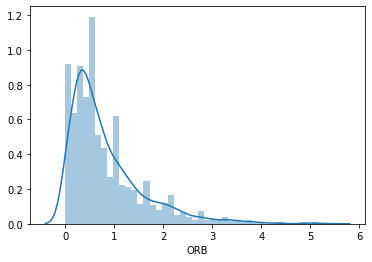

<IPython.core.display.Javascript object>

In [14]:
sns.distplot(nba["ORB"])
plt.show()

## What shot percentage stat has the most variation?

Before we do that:
* Create a dataframe that contains only the columns with `'%'` in the column name. Name this data frame `percents`

In [15]:
percents = nba.filter(like="%")

<IPython.core.display.Javascript object>

* In this data we have missing values, the code below shows a count of missing values per column.  Can you explain why we'd have missing values here?

In [16]:
percents.isna().sum()

FG%      10
3P%     174
2P%      31
eFG%     10
FT%     104
dtype: int64

<IPython.core.display.Javascript object>

* Drop NAs from this `percents` dataframe

In [17]:
percents = percents.dropna()

<IPython.core.display.Javascript object>

Back to the original question: What shot percentage stat has the most variation?

* What metric(s) can we use for this?
* What plot type(s) can we use to show this?

In [18]:
percents.describe()

,FG%,3P%,2P%,eFG%,FT%
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.440527,0.306500,0.488995,0.499103,0.746859
std,0.075228,0.130273,0.087279,0.073780,0.130956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.402000,0.276000,0.448000,0.467000,0.685000
50%,0.438000,0.336000,0.490000,0.504000,0.767000
75%,0.478000,0.375000,0.537000,0.540000,0.831000
max,0.750000,1.000000,1.000000,0.875000,1.000000


<IPython.core.display.Javascript object>

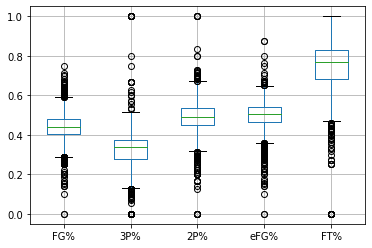

<IPython.core.display.Javascript object>

In [19]:
# IQR - inter quartile range
# Outliers - 1.5 * IQR away from median
percents.boxplot()
plt.show()

----

An aside about standard deviation

In [20]:
# Standard deviation is the
# average distance each observation is from the mean

# if our data is
x = [1, 2, 3, 4, 5]

<IPython.core.display.Javascript object>

In [21]:
# this makes our average
avg = np.mean(x)
avg

3.0

<IPython.core.display.Javascript object>

In [22]:
# the distances from the mean are
dists = avg - x
dists

array([ 2.,  1.,  0., -1., -2.])

<IPython.core.display.Javascript object>

In [23]:
# we dont want negatives here so we'll square these
sq_dists = dists ** 2
sq_dists

array([4., 1., 0., 1., 4.])

<IPython.core.display.Javascript object>

In [24]:
# Now we'll take the average of these distances
avg_sq_dist = np.mean(sq_dists)
avg_sq_dist

2.0

<IPython.core.display.Javascript object>

In [25]:
# we squared these numbers so now we want to undo that squaring
# and this is our standard deviation
np.sqrt(avg_sq_dist)

1.4142135623730951

<IPython.core.display.Javascript object>

In [26]:
# Confirm that this is the same number
np.std(x)

1.4142135623730951

<IPython.core.display.Javascript object>

## Using `.describe()` with `pandas`

* `.describe()` might have already come up depending on how we answered the above questions
* Let's explore `.describe()`'s options using `?` and `help()`

In [27]:
# nba.describe?
# help(nba.describe)

<IPython.core.display.Javascript object>

In [28]:
nba.describe()

,Seas,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2131.000000,2141.000000,2141.000000,...,2037.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000
mean,2017.524988,26.243811,50.024288,23.386735,19.544886,3.091546,6.852125,0.442891,0.786642,2.243765,...,0.738256,0.823867,2.700234,3.521392,1.827464,0.622933,0.391172,1.093087,1.691546,8.321906
std,1.090724,4.254340,26.213597,28.181984,9.134112,2.123561,4.482448,0.102834,0.766646,1.983399,...,0.141208,0.763566,1.824036,2.448152,1.735426,0.425366,0.431842,0.787578,0.771713,5.890566
min,2016.000000,19.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,23.000000,26.000000,0.000000,12.500000,1.500000,3.500000,0.401000,0.100000,0.600000,...,0.667000,0.300000,1.400000,1.800000,0.700000,0.300000,0.100000,0.500000,1.200000,4.000000
50%,2017.000000,26.000000,57.000000,8.000000,19.200000,2.600000,5.800000,0.440000,0.600000,1.800000,...,0.760000,0.600000,2.300000,3.000000,1.200000,0.500000,0.300000,0.900000,1.700000,6.900000
75%,2018.000000,29.000000,74.000000,45.000000,27.100000,4.300000,9.400000,0.489000,1.200000,3.500000,...,0.828000,1.100000,3.500000,4.600000,2.400000,0.900000,0.500000,1.500000,2.200000,11.400000
max,2019.000000,42.000000,82.000000,82.000000,42.000000,10.800000,24.500000,1.000000,5.100000,13.200000,...,1.000000,5.400000,11.100000,16.000000,11.700000,2.400000,6.000000,5.700000,6.000000,36.100000


<IPython.core.display.Javascript object>

In [29]:
nba.describe(include="O")

,Player,Pos,Tm
count,2141,2141,2141
unique,822,12,31
top,Omri Casspi,SG,TOT
freq,7,481,248


<IPython.core.display.Javascript object>

## Descriptive statistics with `groupby`

Sometimes we want descriptive statistics grouped by a categorical column in our data.  For example, instead of the average of the `'PTS'` column for our full dataset, maybe we want to see the average of the `'PTS'` column for each player.

* Calculate the average `'PTS'` grouped by `'Player'`

In [30]:
nba[["PTS", "Player"]].groupby("Player").mean()

,PTS
Player,
A.J. Hammons,2.200000
Aaron Brooks,4.800000
Aaron Gordon,13.875000
Aaron Harrison,2.600000
Aaron Holiday,5.900000
...,...
Zhaire Smith,6.700000
Zhou Qi,1.600000
Álex Abrines,5.333333


<IPython.core.display.Javascript object>

In [31]:
aggs = {"PTS": ["mean", "median", "count"]}
nba.groupby("Player").agg(aggs)

PTS             
                     mean median count
Player                                
A.J. Hammons     2.200000   2.20     1
Aaron Brooks     4.800000   5.00     3
Aaron Gordon    13.875000  14.35     4
Aaron Harrison   2.600000   0.90     3
Aaron Holiday    5.900000   5.90     1
...                   ...    ...   ...
Zhaire Smith     6.700000   6.70     1
Zhou Qi          1.600000   1.60     2
Álex Abrines     5.333333   5.30     3
Ángel Delgado    1.500000   1.50     1
Ömer Aşık        2.633333   2.70     3

[822 rows x 3 columns]

<IPython.core.display.Javascript object>

* Calculate the average, standard deviation, and count of `'PTS'` for each `'Tm'` (team)
* Sort this output in descending order by average points

## Correlations

If we want to explore relationships between 2 numeric columns we might use a correlation.  The correlation between 2 numeric columns ranges between `[-1, 1]`.

* A correlation of -1 is a strong negative correlation
  * For example, `amount of money spent` and `amount of money saved` would be negatively correlated.  As the `amount of money spent` goes up the `amount of money saved` would go down and vice versa.
* A correlation of 0 is a weak correlation
  * For example, the `number of words in the harry potter books` and the `number of arrests in costa rica` are likely not very related.
* A correlation of 1 is a strong positive correlation
  * For example, `amount of ice cream sold` and `temperature` are likely positively correlated.  As the `temperature` goes up the `amount of ice cream sold` likely goes up as well.
  
Note the classic phrase: "correlation does not equal causation".  Just because 2 things are related doesn't mean one thing causes the other ([this site](https://www.tylervigen.com/spurious-correlations) has examples of correlations that are 'spurious' that is, the 2 variables appear related, but they likely aren't).

To run a correlation on a `pandas` dataframe we can use `.corr()`.

* Apply `.corr()` to our dataframe
* What numeric variables are related? is this a positive or negative relationship?

In [32]:
nba.corr()

,Seas,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Seas,1.000000,-0.062238,-0.065330,-0.025641,-0.031789,0.013417,0.006816,0.000030,0.087017,0.099947,...,-0.014709,-0.020887,0.001723,-0.004785,0.023485,-0.023243,-0.022399,-0.031567,-0.011657,0.015206
Age,-0.062238,1.000000,0.097129,0.052577,0.102553,0.044669,0.048297,0.033019,0.125774,0.111453,...,0.160941,-0.027973,0.061908,0.037276,0.119455,0.042097,-0.027747,0.041575,0.053632,0.056049
G,-0.065330,0.097129,1.000000,0.612957,0.661538,0.553311,0.534116,0.242256,0.386091,0.378769,...,0.211229,0.327509,0.503013,0.477054,0.380723,0.466113,0.298136,0.449151,0.522548,0.541657
GS,-0.025641,0.052577,0.612957,1.000000,0.792136,0.745068,0.724638,0.191149,0.457519,0.453447,...,0.155701,0.427616,0.653866,0.620516,0.529564,0.603101,0.402793,0.639407,0.572896,0.733619
MP,-0.031789,0.102553,0.661538,0.792136,1.000000,0.882428,0.892086,0.187641,0.633855,0.643484,...,0.243376,0.404076,0.716963,0.660156,0.666038,0.752456,0.399975,0.771876,0.738177,0.878088
FG,0.013417,0.044669,0.553311,0.745068,0.882428,1.000000,0.977415,0.269365,0.603180,0.602737,...,0.240059,0.423060,0.714617,0.664341,0.658155,0.657515,0.414233,0.822773,0.621798,0.988321
FGA,0.006816,0.048297,0.534116,0.724638,0.892086,0.977415,1.000000,0.122950,0.688483,0.705278,...,0.289490,0.305598,0.648234,0.578278,0.697330,0.679482,0.319624,0.833114,0.591889,0.981857
FG%,0.000030,0.033019,0.242256,0.191149,0.187641,0.269365,0.122950,1.000000,-0.087120,-0.158779,...,-0.172114,0.444472,0.327856,0.383189,0.024695,0.083110,0.380842,0.136760,0.301600,0.219191
3P,0.087017,0.125774,0.386091,0.457519,0.633855,0.603180,0.688483,-0.087120,1.000000,0.981346,...,0.382406,-0.171448,0.236506,0.122438,0.484285,0.479714,-0.049588,0.479710,0.295673,0.668757
3PA,0.099947,0.111453,0.378769,0.453447,0.643484,0.602737,0.705278,-0.158779,0.981346,1.000000,...,0.380962,-0.185492,0.239172,0.119980,0.508577,0.499337,-0.058530,0.502603,0.300778,0.670108


<IPython.core.display.Javascript object>

## Creating your own statistics

Sometimes you might create some metric to summarize a record.  For example, we all have a credit score that is a combination of a lot of separate metrics.  Some of these style of metrics might be referred to as a index (i.e. a financial index), note that this is different than a `pandas` index.

How might we create a player rating metric for our data?

In [33]:
# Note, not all of these values are on the same scale
# (i.e. the max FG% is 1, but PTS can have higher values)
# This being on different scales would be an issue.
# How might you put all of these columns on the same scale
# before creating your rating?
nba["bigman_rating"] = (
    nba["PTS"] * 0.3
    + nba["ORB"] * 0.15
    + nba["DRB"] * 0.15
    + nba["FG%"] * 0.1
    + nba["BLK"] * 0.3
)
nba.head()

,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,bigman_rating
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,1.9257
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7,1.0272
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,1.2795
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,5.9545
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,4.0626


<IPython.core.display.Javascript object>